<a href="https://colab.research.google.com/github/zaranasavani/Spaceship-Titanic/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! unzip /content/spaceship-titanic.zip -d ./data

Archive:  /content/spaceship-titanic.zip
  inflating: ./data/sample_submission.csv  
  inflating: ./data/test.csv         
  inflating: ./data/train.csv        


In [2]:
import pandas as pd

train_data = pd.read_csv("./data/train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_data = pd.read_csv("./data/test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
sample_sub = pd.read_csv("./data/sample_submission.csv")
sample_sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [5]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

In [6]:
print(train_data.isnull().sum())
test_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


In [7]:
print(len(train_data))
print(len(test_data))

8693
4277


In [8]:
train_data["HomePlanet"]=train_data["HomePlanet"].fillna(train_data["HomePlanet"].mode()[0])
train_data["CryoSleep"]=train_data["CryoSleep"].fillna(train_data["CryoSleep"].mode()[0])
train_data["Cabin"]=train_data["Cabin"].fillna(train_data["Cabin"].mode()[0])
train_data["Destination"]=train_data["Destination"].fillna(train_data["Destination"].mode()[0])
train_data["VIP"]=train_data["VIP"].fillna(train_data["VIP"].mode()[0])
train_data["Name"]=train_data["Name"].fillna("Unknown")
train_data["Age"]=train_data["Age"].fillna(train_data["Age"].median())
train_data["RoomService"]=train_data["RoomService"].fillna(train_data["RoomService"].median())
train_data["FoodCourt"]=train_data["FoodCourt"].fillna(train_data["FoodCourt"].median())
train_data["ShoppingMall"]=train_data["ShoppingMall"].fillna(train_data["ShoppingMall"].median())
train_data["Spa"]=train_data["Spa"].fillna(train_data["Spa"].median())
train_data["VRDeck"]=train_data["VRDeck"].fillna(train_data["VRDeck"].median())

<ipython-input-8-5e596a0b03cd>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data["CryoSleep"]=train_data["CryoSleep"].fillna(train_data["CryoSleep"].mode()[0])
<ipython-input-8-5e596a0b03cd>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data["VIP"]=train_data["VIP"].fillna(train_data["VIP"].mode()[0])


In [9]:
test_data["HomePlanet"]=test_data["HomePlanet"].fillna(test_data["HomePlanet"].mode()[0])
test_data["CryoSleep"]=test_data["CryoSleep"].fillna(test_data["CryoSleep"].mode()[0])
test_data["Cabin"]=test_data["Cabin"].fillna(test_data["Cabin"].mode()[0])
test_data["Destination"]=test_data["Destination"].fillna(test_data["Destination"].mode()[0])
test_data["VIP"]=test_data["VIP"].fillna(test_data["VIP"].mode()[0])
test_data["Name"]=test_data["Name"].fillna("Unknown")
test_data["Age"]=test_data["Age"].fillna(test_data["Age"].median())
test_data["RoomService"]=test_data["RoomService"].fillna(test_data["RoomService"].median())
test_data["FoodCourt"]=test_data["FoodCourt"].fillna(test_data["FoodCourt"].median())
test_data["ShoppingMall"]=test_data["ShoppingMall"].fillna(test_data["ShoppingMall"].median())
test_data["Spa"]=test_data["Spa"].fillna(test_data["Spa"].median())
test_data["VRDeck"]=test_data["VRDeck"].fillna(test_data["VRDeck"].median())


<ipython-input-9-a1605a44c118>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["CryoSleep"]=test_data["CryoSleep"].fillna(test_data["CryoSleep"].mode()[0])
<ipython-input-9-a1605a44c118>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data["VIP"]=test_data["VIP"].fillna(test_data["VIP"].mode()[0])


In [10]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

In [11]:
X_train = train_data.drop(columns=["Transported","Name"])
print(X_train.head())
X_test = test_data.drop(columns=["Name"])
print(X_test.head())

  PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa      False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth      False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa      False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa      False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth      False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  
0          0.0        0.0           0.0     0.0     0.0  
1        109.0        9.0          25.0   549.0    44.0  
2         43.0     3576.0           0.0  6715.0    49.0  
3          0.0     1283.0         371.0  3329.0   193.0  
4        303.0       70.0         151.0   565.0     2.0  
  PassengerId HomePlanet  CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth       True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth      False  F/4/S  TRAPPIST-1e  19.0  False   
2  

In [12]:
y_train = train_data["Transported"]
print(y_train.head())
y_test = sample_sub["Transported"]
print(y_test.head())

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: Transported, dtype: bool


In [13]:
X_train = pd.get_dummies(X_train, columns=["HomePlanet","Cabin","Destination"])
X_test = pd.get_dummies(X_test, columns=["HomePlanet","Cabin","Destination"])

X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best hyperparameters: {grid_search.best_params_}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean()}")



Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Cross-validation accuracy: 0.7365734708584156


In [23]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(best_model, X_train, y_train, cv=skf, scoring='accuracy')
print(f"Stratified Cross-validation accuracy: {scores.mean()}")


Stratified Cross-validation accuracy: 0.7365734708584156


In [19]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(max_depth=30,min_samples_leaf=1,min_samples_split=5,n_estimators=100,random_state=42,class_weight="balanced",bootstrap=True)
model1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_split=5, random_state=42)

[0.01419188 0.13694567 0.03118318 ... 0.01723536 0.00201008 0.0080312 ]


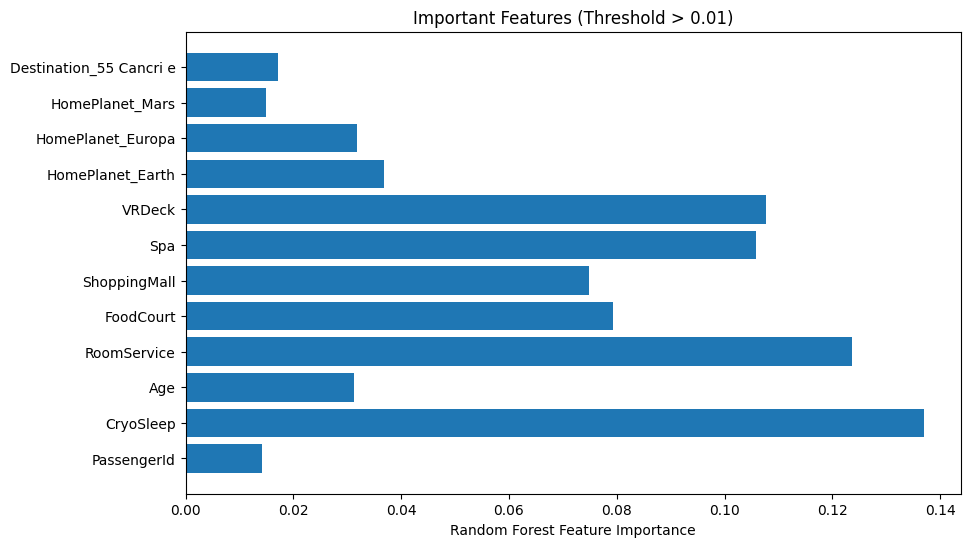

In [26]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = model1.feature_importances_
print(feature_importance)
threshold = 0.01  # Only show features with importance greater than this threshold
important_idx = np.where(feature_importance > threshold)[0]
plt.figure(figsize=(10, 6))
plt.barh(range(len(important_idx)), feature_importance[important_idx], align='center')
plt.yticks(range(len(important_idx)), np.array(X_train.columns)[important_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Important Features (Threshold > 0.01)")
plt.show()



In [20]:
prediction = model1.predict(X_test)
submission_df = pd.DataFrame({
    "PassengerId" : X_test["PassengerId"],
    "Transported" : prediction
})
submission_df.to_csv("submission.csv", index=False)

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy}")

Accuracy: 0.568856675239654


In [27]:
# Get indices of features with high importance
top_features = np.where(feature_importance > 0.01)[0]
X_train_top = X_train.iloc[:, top_features]

# Retrain your model on the top features
model_top = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42)
model_top.fit(X_train_top, y_train)

# Evaluate on test set (with same selected top features)
X_test_top = X_test.iloc[:, top_features]
print(f"Model accuracy on top features: {model_top.score(X_test_top, y_test)}")


Model accuracy on top features: 0.508534019172317
